# **Sistem Rekomendasi Product di Sociolla**

## **Sumber Dataset**
https://www.kaggle.com/datasets/ibrahimhafizhan/sociolla-all-brands-products-catalog

- **Nama:** Nabila Neva Rahmawati
- **Email:** nabilanevaaa@gmail.com
- **ID Dicoding:** nabilaneva

# **Import Library**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from google.colab import files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# **Data Loading**

Pada bagian ini, file kaggle.json di-upload untuk autentikasi ke Kaggle, kemudian API key disalin ke direktori yang tepat. Dataset sociolla-all-brands-products-catalog diunduh dan diekstrak. Setelah itu, file CSV dibaca menggunakan pandas dan lima baris pertama ditampilkan dengan `df.head()` untuk melihat gambaran awal data sebelum analisis lebih lanjut.

In [2]:
# Upload file kaggle.json untuk autentikasi
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nabilaneva","key":"a2bf5a36173284d034f2e97a666bdf6d"}'}

In [3]:
# Setup API key agar bisa akses Kaggle Dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset dari Kaggle: Sociolla All Brands Products Catalog
!kaggle datasets download -d ibrahimhafizhan/sociolla-all-brands-products-catalog

# Unzip file dataset
!unzip sociolla-all-brands-products-catalog.zip

Dataset URL: https://www.kaggle.com/datasets/ibrahimhafizhan/sociolla-all-brands-products-catalog
License(s): other
Archive:  sociolla-all-brands-products-catalog.zip
  inflating: products_all_brands.csv  


In [4]:
# Membaca file csv
df = pd.read_csv("products_all_brands.csv")

# Menampilkan 5 baris pertama
df.head()

,brand_name,product_name,product_id,beauty_point_earned,price_range,price_by_combinations,url,active_date,default_category,categories,rating_types_str,average_rating,total_reviews,average_rating_by_types,total_recommended_count,total_repurchase_maybe_count,total_repurchase_no_count,total_repurchase_yes_count,total_in_wishlist
0,796_3ce,MULTI EYE COLOR PALETTE,97802,130,Rp 555.000 - Rp 687.000,NaN,https://www.sociolla.com/eyeshadow/69460-phan-...,2022-10-03T03:30:06.681Z,Eyeshadow,Makeup; Eyes; Eyeshadow,is_star_long_wear;is_star_packaging;is_star_pi...,4.920000,5,"""star_long_wear"": 5; ""star_packaging"": 4.8; ""s...",5,0,0,5,717
1,796_3ce,VELVET LIP TINT,97810,50,Rp 264.000,NaN,https://www.sociolla.com/lip-cream/69468-son-k...,2022-10-03T03:02:40.340Z,Lip Cream,Makeup; Lips; Lip Cream,is_star_long_wear;is_star_packaging;is_star_pi...,4.576190,42,"""star_long_wear"": 4.309523809523809; ""star_pac...",42,10,2,30,682
2,796_3ce,LIP COLOR,97822,60,Rp 317.000,NaN,https://www.sociolla.com/lip-matte/69480-son-t...,2023-05-30T09:49:15.158Z,Lipstick,Makeup; Lips; Lipstick,is_star_long_wear;is_star_packaging;is_star_pi...,0.000000,0,NaN,0,0,0,0,173
3,796_3ce,MINI MULTI EYE COLOR PALETTE,97833,80,Rp 423.000,NaN,https://www.sociolla.com/eyeshadow/69491-phan-...,2022-10-03T03:27:01.334Z,Eyeshadow,Makeup; Eyes; Eyeshadow,is_star_long_wear;is_star_packaging;is_star_pi...,4.883333,6,"""star_long_wear"": 4.916666666666667; ""star_pac...",12,1,0,11,257
4,796_3ce,FACE BLUSH,97801,60,Rp 300.000,NaN,https://www.sociolla.com/blush/69459-phan-ma-h...,2022-10-03T03:22:26.610Z,Blush,Makeup; Face; Blush,is_star_long_wear;is_star_packaging;is_star_pi...,4.858824,13,"""star_long_wear"": 4.9411764705882355; ""star_pa...",17,2,0,15,387


# **Data Understanding**

Pada tahap ini, dilakukan pemahaman awal terhadap dataset dengan menggunakan beberapa fungsi dasar. Fungsi `df.info()` memberikan informasi umum, `df.describe()` menyajikan statistik deskriptif, `df.isna().sum()` menghitung missing values, dan `df.duplicated().sum()` mendeteksi duplikat. Untuk variasi data, digunakan `df.nunique()` untuk menghitung nilai unik. Selanjutnya, analisis dilakukan pada 10 kategori teratas dan 10 brand teratas berdasarkan jumlah rating yang diterima.

In [5]:
# Menampilkan informasi umum tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7636 entries, 0 to 7635
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   brand_name                    7636 non-null   object 
 1   product_name                  7636 non-null   object 
 2   product_id                    7636 non-null   int64  
 3   beauty_point_earned           7636 non-null   int64  
 4   price_range                   7636 non-null   object 
 5   price_by_combinations         4087 non-null   object 
 6   url                           7636 non-null   object 
 7   active_date                   5534 non-null   object 
 8   default_category              7636 non-null   object 
 9   categories                    7632 non-null   object 
 10  rating_types_str              7561 non-null   object 
 11  average_rating                7636 non-null   float64
 12  total_reviews                 7636 non-null   int64  
 13  ave

In [6]:
# Menampilkan statistik deskriptif untuk kolom numerik
df.describe()

,product_id,beauty_point_earned,average_rating,total_reviews,total_recommended_count,total_repurchase_maybe_count,total_repurchase_no_count,total_repurchase_yes_count,total_in_wishlist
count,7636.000000,7636.000000,7636.000000,7636.000000,7636.000000,7636.000000,7636.000000,7636.000000,7636.000000
mean,82903.974725,37.236773,3.517905,198.197617,186.560503,40.603457,15.479963,141.873494,633.016108
std,27257.173650,46.056962,2.000138,852.067365,803.185318,169.473278,79.716058,625.673542,2055.067002
min,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-317.000000
25%,75267.000000,10.000000,3.910714,1.000000,1.000000,0.000000,0.000000,0.000000,28.000000
50%,91856.500000,20.000000,4.576923,9.000000,9.000000,2.000000,0.000000,6.000000,132.000000
75%,101825.500000,50.000000,4.738155,76.000000,71.000000,17.000000,6.000000,52.000000,480.000000
max,109155.000000,610.000000,5.000000,21536.000000,20804.000000,5025.000000,2824.000000,17653.000000,58568.000000


In [7]:
# Menampilkan missing values
df.isna().sum()

,0
brand_name,0
product_name,0
product_id,0
beauty_point_earned,0
price_range,0
price_by_combinations,3549
url,0
active_date,2102
default_category,0
categories,4


In [8]:
# Menampilkan data duplikat
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
# Menampilkan jumlah brand dan kategori utama produk yang berbeda
print('Jumlah produk yang berbeda: ', len(df['product_name'].unique()))
print('Jumlah brand yang berbeda: ', len(df['brand_name'].unique()))
print('Jumlah kategori utama produk yang berbeda: ', len(df['default_category'].unique()))

Jumlah produk yang berbeda:  7576
Jumlah brand yang berbeda:  321
Jumlah kategori utama produk yang berbeda:  195


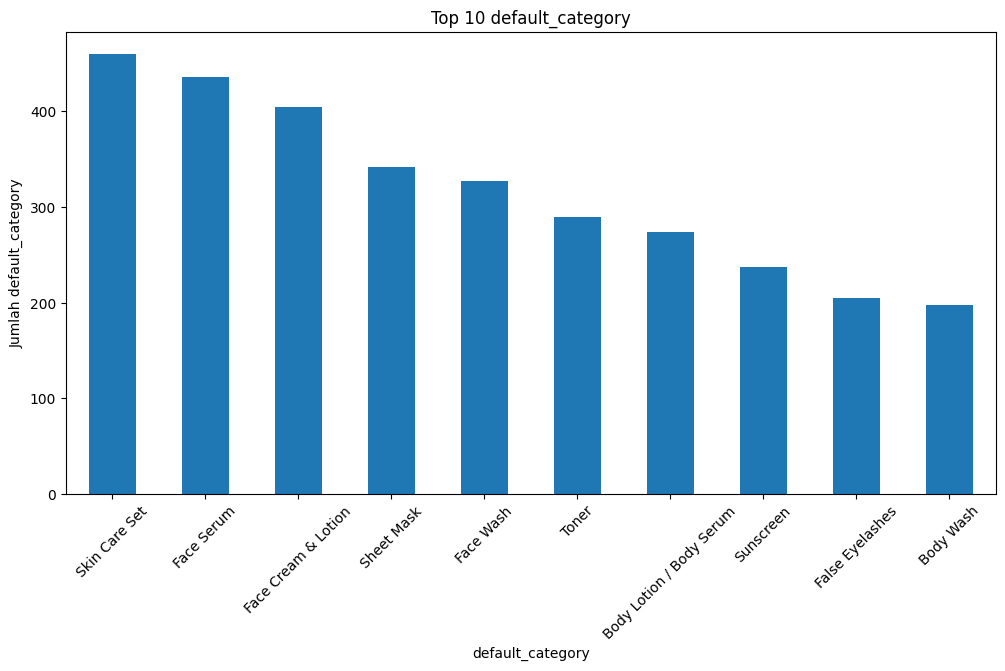

In [10]:
# Distribusi default_category 10 teratas
plt.figure(figsize=(12,6))
df['default_category'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 default_category')
plt.xlabel('default_category')
plt.ylabel('Jumlah default_category')
plt.xticks(rotation=45)
plt.show()

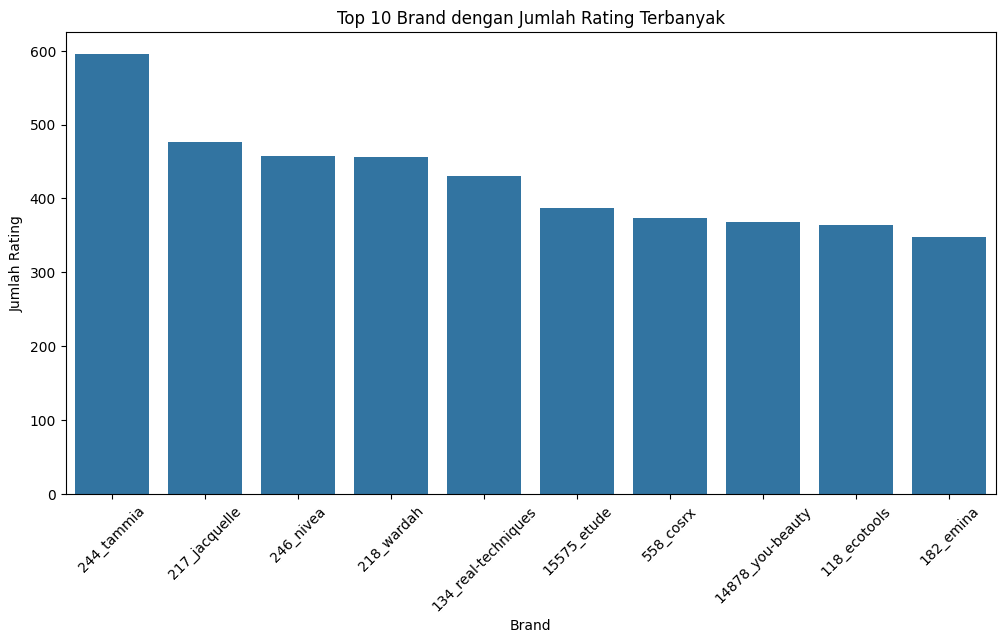

In [11]:
# Mengambil 10 brand teratas berdasarkan jumlah rating
jumlah_rating_per_brand = df.groupby('brand_name')['average_rating'].sum()
top_brand = jumlah_rating_per_brand.sort_values(ascending=False).head(10).reset_index()
top_brand.columns = ['brand_name', 'average_rating']

# Distribusi 10 brand dengan jumlah rating terbanyak
plt.figure(figsize=(12, 6))
sns.barplot(data=top_brand, x='brand_name', y='average_rating')
plt.title('Top 10 Brand dengan Jumlah Rating Terbanyak')
plt.xlabel('Brand')
plt.ylabel('Jumlah Rating')
plt.xticks(rotation=45)
plt.show()

Dataset terdiri dari 7.636 baris dan 19 kolom tanpa duplikasi, dengan beberapa nilai hilang: `price_by_combinations` (3.549 data), `active_date` (2.102 data), dan `average_rating_by_types` (1.846 data). Kategori produk terbanyak adalah Face Serum, diikuti oleh Face Cream & Lotion, Sheet Mask, dan Face Wash. Sedangkan brand dengan rating terbanyak adalah Tammia, diikuti oleh Jacquelle, Nivea, Wardah, dan lainnya.

# **Data Preparation**

Pada tahap ini, dilakukan pembersihan data dengan menghapus semua baris yang mengandung nilai kosong (NaN) menggunakan `df.dropna()`. Setelah itu, dilakukan pengecekan ulang dengan `df.isna().sum()` untuk memastikan tidak ada lagi missing value dalam dataset.

In [12]:
# Menghapus semua baris yang memiliki nilai NaN
df = df.dropna()

In [13]:
# Mengecek kembali missing value
df.isna().sum()

,0
brand_name,0
product_name,0
product_id,0
beauty_point_earned,0
price_range,0
price_by_combinations,0
url,0
active_date,0
default_category,0
categories,0


Semua baris yang mengandung nilai kosong telah dihapus menggunakan `df.dropna()`. Hasilnya menunjukkan bahwa tidak ada lagi nilai kosong dalam dataset.

## **TF-IDF Vectorizer**

TF-IDF Vectorizer digunakan untuk mengonversi data kategori produk menjadi representasi numerik. Dengan menghitung IDF pada data `default_category`, hasilnya diubah menjadi matriks TF-IDF yang menggambarkan pentingnya setiap kata dalam kategori produk. Matriks ini kemudian diubah menjadi DataFrame untuk mempermudah analisis kemiripan antar produk dalam sistem rekomendasi.

In [15]:
data = df
data.sample(5)

,brand_name,product_name,product_id,beauty_point_earned,price_range,price_by_combinations,url,active_date,default_category,categories,rating_types_str,average_rating,total_reviews,average_rating_by_types,total_recommended_count,total_repurchase_maybe_count,total_repurchase_no_count,total_repurchase_yes_count,total_in_wishlist
6028,2265_scarlett-whitening,Scarlett Whitening Body Lotion Happy,97648,10,Rp 82.500,"""300 ml"": 82500",https://www.sociolla.com/body-lotion/69306-sca...,2022-08-31T08:10:09.820Z,Body Lotion / Body Serum,Bath & Body; Body Care; Body Lotion,is_star_effectiveness;is_star_packaging;is_sta...,4.654762,42,"""star_effectiveness"": 4.642857142857143; ""star...",41,6,1,35,282
6062,2265_scarlett-whitening,Scarlett Whitening C-Power Face Mist,100512,10,Rp 82.500,"""100 ml"": 82500",https://www.sociolla.com/face-mist/72170-c-pow...,2022-12-08T07:06:09.005Z,Face Mist,Skincare; Moisturizer; Face Mist,is_star_effectiveness;is_star_packaging;is_sta...,4.650000,15,"""star_effectiveness"": 4.4; ""star_packaging"": 4...",15,3,2,10,274
2375,15301_eze-nails,Spot-On Pedicure Red Carpet Ready,89937,20,Rp 109.990,"""Special Design"": 109990",https://www.sociolla.com/nail-arts/61595-spot-...,2022-12-21T11:19:52.078Z,Nail Arts,Nail Care; Nail Beauty; Nail Arts,is_star_durability;is_star_effectiveness;is_st...,5.000000,1,"""star_durability"": 5; ""star_effectiveness"": 5;...",1,0,0,1,25
551,1284_barenbliss,Barenbliss True Beauty Inside Cushion,93060,30,Rp 159.000,""" 002 Ivory Blossom Bud"": 159000; ""02 Medium B...",https://www.sociolla.com/cushion/64718-barenbl...,2022-06-13T03:18:46.294Z,Cushion,Makeup; Face; Cushion,is_star_long_wear;is_star_packaging;is_star_pi...,4.513793,754,"""star_long_wear"": 4.389920424403183; ""star_pac...",692,192,76,486,6262
1748,15026_dew-it,Dew It In The Shower - Radiant Body Wash,95490,20,Rp 149.000,"""300 ml"": 149000",https://www.sociolla.com/bath-body/67148-dew-i...,2022-05-31T03:37:41.482Z,Body Wash,Bath & Body; Body Cleanser; Body Wash,is_star_effectiveness;is_star_packaging;is_sta...,4.731250,40,"""star_effectiveness"": 4.8; ""star_packaging"": 4...",40,11,1,28,244


In [16]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data cuisine
tf.fit(data['default_category'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['accessories', 'acne', 'after', 'ampoule', 'and', 'applicators',
       'aromatherapy', 'arts', 'bags', 'balm', 'bar', 'bath', 'bb',
       'beauty', 'blotting', 'blush', 'body', 'booster', 'bottles',
       'bronzer', 'brow', 'brush', 'brushes', 'bug', 'butter', 'cake',
       'cap', 'care', 'case', 'cc', 'clay', 'cleanser', 'cleansing',
       'clipper', 'clippers', 'clothing', 'color', 'combs', 'concealer',
       'conditioner', 'contour', 'cotton', 'crayon', 'cream', 'cushion',
       'de', 'deodorant', 'dry', 'eau', 'essence', 'exfoliants',
       'exfoliator', 'eye', 'eyebrows', 'eyelash', 'eyelashes',
       'eyeliner', 'eyeshadow', 'face', 'facial', 'false', 'feminine',
       'files', 'foam', 'foot', 'foundation', 'gel', 'gloss', 'glue',
       'hair', 'hand', 'highlighter', 'in', 'leave', 'liners', 'lip',
       'lipstick', 'loose', 'lotion', 'makeup', 'manicure', 'mascara',
       'mask', 'micellar', 'mirror', 'mist', 'moisturizer', 'mousse',
       'nail', 'nipple', 

In [17]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['default_category'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(2738, 158)

In [18]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
# Membuat dataframe TF-IDF dengan baris berupa nama produk dan kolom berupa jenis kategori
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.product_name
).sample(22, axis=1).sample(20, axis=0)

,mascara,ampoule,manicure,bags,face,brow,booster,polish,cushion,tinted,...,after,lip,sunscreen,contour,arts,makeup,nail,conditioner,supplement,cap
product_name,,,,,,,,,,,,,,,,,,,,,
Organic Hair Growth Treatment Shampoo,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Acne Spot Serum,0.0,0.0,0.0,0.0,0.635426,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yogurt Vit+ Mask Sakura Brightening Solution,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pure Centella Acne Calming Toner,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Barefoot Healing Overnight Foot Treatment 124ml,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lotion Healthy Bright Perfect 10,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tish Invisible Eyelid Tape,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hair Vitamin Moroccan Oil Vitality Blister,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fresh Herb Origin Cleansing Water Bakuchiol,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Hasil dari TF-IDF Vectorizer menghasilkan matriks 2738 produk dan 158 kategori, di mana setiap produk diberi nilai relevansi terhadap kategori tertentu. Matriks ini membantu mengidentifikasi kategori yang paling relevan untuk setiap produk.

# **Modeling**

## **Cosine Similarity**

Cosine similarity digunakan untuk mengukur kesamaan antar produk berdasarkan deskripsi teks, menggunakan matriks TF-IDF dan dataframe untuk menampilkan tingkat kesamaannya.

In [20]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [21]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama product
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['product_name'], columns=data['product_name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap product
cosine_sim_df.sample(20, axis=1).sample(20, axis=0)

Shape: (2738, 2738)


product_name,Instaperfect Mattesetter Lip Matte Paint,Glossy Mood Lip Tint,UV Fresh & Bright SPF 50/PA+++ Instant Cover,Essential Comfort Firming Cream,Spot-On Manicure Honesty in Lime,Barenbliss Fine to Refine Compact Powder,Cover All Perfect Cushion,Watermelon Hydro Glow Serum,Blood 29cm Corn Pad 12s,The Realest Lightweight Concealer,White Expert Make Up Remover,HAIR SPA SMOOTH KERATIN,Dreamsetter Glowy Setting Spray,Shower Scrub Argan Oil & Walnut,ARIUL 7days Mask Aloe + H,Total Eclipse Pen Liner,Niacinamide 10% + Dipotassium Glycyrrhizate Glorious Serum,Scalp Massager,Let It Glow Body Serum Summertrain,YOU AcnePlus Balancing Skin Toner
product_name,,,,,,,,,,,,,,,,,,,,
Kojic Collagen Body Lotion,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.000000,0.570289,0.0
Au Naturel,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
Healthy Matte UV Protector SPF 50+ PA++++,0.000000,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
Dandruff Care Nutritive Solutions Shampoo,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
Skin Buddy Face Toner,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0
Creamy Milk Cleansing Lotion,0.400486,0.0,0.0,1.000000,0.0,0.0,0.0,0.311377,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.311377,0.000000,0.258040,0.0
Double Joy Inside Holiday Edition Cushion Kit (cushion + refill),0.000000,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
Watermelon Mask Sheet,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.0
Mugwort Cream,0.400486,0.0,0.0,1.000000,0.0,0.0,0.0,0.311377,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.311377,0.000000,0.258040,0.0


Hasil Cosine Similarity menunjukkan tingkat kesamaan antar produk, dengan nilai 1 berarti identik dan nilai mendekati 0 berarti tidak serupa. Matriks ini membantu mengidentifikasi produk yang saling terkait berdasarkan kesamaan deskripsi.

## **Mendapatkan Rekomendasi**


Fungsi `product_recommendations` memberikan rekomendasi produk serupa berdasarkan cosine similarity, menampilkan produk teratas beserta informasi kategori.

In [22]:
def product_recommendations(nama_product, similarity_data=cosine_sim_df, items=data[['product_name', 'default_category']], k=10):

    # Mengambil indeks produk dengan similarity tertinggi menggunakan argpartition (efisien untuk top-k)
    index = similarity_data.loc[:,nama_product].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Menghapus produk awal dari daftar rekomendasi
    closest = closest.drop(nama_product, errors='ignore')

    # Menggabungkan dengan data produk untuk informasi tambahan
    return pd.DataFrame(closest).merge(items).head(k)

In [23]:
# Menampilkan informasi produk dengan nama 'Aloe Vera Clay Mask'
data[data.product_name.eq('Aloe Vera Clay Mask')]

,brand_name,product_name,product_id,beauty_point_earned,price_range,price_by_combinations,url,active_date,default_category,categories,rating_types_str,average_rating,total_reviews,average_rating_by_types,total_recommended_count,total_repurchase_maybe_count,total_repurchase_no_count,total_repurchase_yes_count,total_in_wishlist
1133,1138_breylee,Aloe Vera Clay Mask,105165,0,Rp 20.000,"""Aloe Vera"": 20000",https://www.sociolla.com/clay-mask/76823-aloe-...,2023-07-06T09:10:11.417Z,Clay Mask,Skincare; Face Mask; Clay Mask,is_star_effectiveness;is_star_packaging;is_sta...,4.386364,11,"""star_effectiveness"": 4.181818181818182; ""star...",10,3,2,6,85


In [24]:
# Mendapatkan rekomendasi product yang mirip dengan Aloe Vera Clay Mask
product_recommendations('Aloe Vera Clay Mask')

,product_name,default_category
0,Clay Mask Sebum Control,Clay Mask
1,Alaska Volcano Deep Pores Cleansing Clay Mask,Clay Mask
2,[BUNDLE] Jacquelle Disney Princess Ariel editi...,Clay Mask
3,Butter Clay Mask Moist and Calming Clay Mask,Clay Mask
4,Fresh Clarifying Clay Mask,Clay Mask
5,"Freeman Bundle Bye, Pores! Mask",Clay Mask
6,Lightening Blue Clay Mask,Clay Mask
7,Feeling Beautiful Anti-Stress Dead Sea Mineral...,Clay Mask
8,Orange Blossom Clay Mask,Clay Mask
9,Rose and Sea Buckthorn Pink Mask,Clay Mask


Hasil rekomendasi produk menunjukkan produk serupa dengan "Aloe Vera Clay Mask", termasuk informasi seperti nama produk, kategori, harga, rating, dan jumlah ulasan. Rekomendasi ini mencakup produk seperti "Clay Mask Sebum Control", "Alaska Volcano Deep Pores Cleansing Clay Mask", dan lainnya dalam kategori "Clay Mask".